<a href="https://colab.research.google.com/github/Ian0308/NewsGPT-Ian/blob/main/NewsGPT_Projeto_Ian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação bibliotecas

In [ ]:
!pip install beautifulsoup4
!pip install psycopg2
!pip install nltk
!pip install news-Please

# importação de dependências

In [ ]:
from bs4 import BeautifulSoup
import psycopg2 as ps
from urllib.request import Request, urlopen
from urllib.error import HTTPError
from datetime import datetime
import time
import random

# conexão com BD

In [ ]:
import psycopg2 as ps

def connection():
    host = 'aws-0-us-east-1.pooler.supabase.com'
    database = 'postgres'
    user = 'postgres.uukllbhblupwoaizjsyh'
    password = 'noticia2025'
    port = 6543

    try:
        conn = ps.connect(
            host=host,
            database=database,
            user=user,
            password=password,
            port=port
        )
    except ps.OperationalError as e:
        raise e
    else:
        return conn
conn = connection()
print("Conexão bem-sucedida!") if conn else print("Erro na conexão.")


Conexão bem-sucedida!


# coletas



##links

In [ ]:

def get_link_noticias(url):
  req = Request(url)
  page = urlopen(req)
  soup = BeautifulSoup(page, "lxml")
  links = []
  for link in soup.find_all('a'):
    x = str(link.get("href"))
    if ('http' in x) and ('cnn'in x):
      links.append(x)

  return links





In [ ]:
def get_links (url):
    req = Request(url)
    page = urlopen(req)
    soup = BeautifulSoup(page, "lxml")
    links = []

    for link in soup.find_all('a'):
        x = str(link.get("href"))
        if ('http' in x) and ('cnn'in x):
            links.append(x)

    return links

url = "https://www.cnnbrasil.com.br/entretenimento/justin-bieber-publica-nova-foto-com-o-filho-jack-blues-veja/"
links = get_links(url)




##Titulos

In [ ]:
def get_titulo(link):
  req = Request(link)

  try:
    page = urlopen(req)
  except HTTPError as e:
    if e.code == 429 or e.code == 999 or e.code == 404:
      wait_time = random.uniform(1,5)
      time.sleep(wait_time)
      return get_titulo(link)
    else:
      raise
  soup = BeautifulSoup(page, "lxml")
  titulo = soup.find_all(['h1'])

  if titulo:
    return titulo[0].text
  else:
    return ''



##Texto


In [ ]:
def get_texto(link):
  req = Request(link)

  try:
    page = urlopen(req)
  except HTTPError as e:
    if e.code == 429 or e.code == 999 or e.code == 404:
      wait_time = random.uniform(1,5)
      time.sleep(wait_time)
      return get_texto(link)
    else:
      raise
  soup = BeautifulSoup(page, "lxml")

  conteudo_artigo = soup.find('div', class_='single-content')

  if conteudo_artigo:
    texto = '\n'.join([p.text.strip() for p in conteudo_artigo.find_all('p')])
    return texto
  else:
    return ''
  #textos = []


  #texto = NewsPlease.from_url(link)
  #return texto.text


  #for tag in soup.find_all(['p']):
  #  textos.append(tag.text.strip())

 # return textos




##Data publicação

In [ ]:
def get_data_publicacao (link):
  req = Request(link)

  try:
    page = urlopen(req)
  except HTTPerror as e:
    if e.code == 429:
      wait.time = random.uniform(1,5)
      time.sleep(wait.time)
      return get_data_publicação(link)
    else:
      raise

  soup = BeautifulSoup(page, "lxml")

  time = soup.find('time', class_="single-header__time", attrs={'datetime': True})

  if time:
    data_str = time['datetime']
    data_publicacao = datetime.fromisoformat(data_str)
    return data_publicacao
  else:
    return None


##Coleta Notícia - Corpo e Título

In [ ]:
#ir vendo os erros e tratando com try catch
#fazer uma função para coletar titulo e data e inserir aqui
conn = connection()
cursor = conn.cursor()
cursor.execute("SELECT id, url FROM noticia WHERE data_coleta IS NULL")
pendentes = cursor.fetchall()

for noticia_id, url in pendentes:
    titulo = get_titulo(url)
    texto = get_texto(url)
    data_coleta = datetime.now()
    data_publicacao = get_data_publicacao(url)

    if texto.strip():
        titulo = url.split("/")[-2].replace("-", " ").capitalize()
        categoria = categoria = coleta_categoria(url)

        try:
            update_query = """
            UPDATE noticia
            SET titulo = %s,
                texto = %s,
                categoria = %s,
                data_coleta = %s,
                data_visita = %s,
                data_publicacao = %s
            WHERE id = %s
            """
            cursor.execute(update_query, (
                titulo,
                texto,
                categoria,
                data_coleta,
                data_coleta,
                noticia_id
            ))
            conn.commit()
            print(f"[OK] Notícia atualizada: {url}")
        except Exception as e:
            conn.rollback()
            print(f"[ERRO] Falha ao atualizar {url}: {e}")
    else:
        print(f"[AVISO] Sem conteúdo em {url}")


[AVISO] Sem conteúdo em https://stories.cnnbrasil.com.br/?p=349903
[AVISO] Sem conteúdo em https://stories.cnnbrasil.com.br/?p=350302
[AVISO] Sem conteúdo em https://stories.cnnbrasil.com.br/?p=348410
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.br/eleicoes/2024/apuracao/am/tefe/primeiro-turno/
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.br/eleicoes/2024/apuracao/mg/nova-modica/primeiro-turno/
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.br/eleicoes/2024/apuracao/rs/nova-padua/primeiro-turno/
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.br/eleicoes/2024/apuracao/mg/natalandia/primeiro-turno/
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.br/eleicoes/2024/apuracao/pi/eliseu-martins/primeiro-turno/
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.br/eleicoes/2024/apuracao/pr/santa-helena/primeiro-turno/
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.br/eleicoes/2024/apuracao/pi/antonio-almeida/primeiro-turno/
[AVISO] Sem conteúdo em https://www.cnnbrasil.com.b

KeyboardInterrupt: 

In [ ]:
from urllib.parse import urlparse

def coleta_categoria(url):
    """
    Extrai a categoria de uma URL da CNN Brasil, se aplicável.
    Exemplo:
    https://www.cnnbrasil.com.br/politica/alguma-noticia -> retorna 'politica'
    Continuar verificações para outras páginas
    """
    try:
        parsed = urlparse(url)
        dominio = parsed.netloc
        caminho = parsed.path.strip("/").split("/")
        #Cria uma lista de categoria
        if "cnnbrasil.com.br" in dominio and len(caminho) >= 1:
            categoria = caminho[0]
            return categoria
    except Exception as e:
        print(f"[ERRO] Falha ao extrair categoria da URL {url}: {e}")

    return "desconhecida"


#Inserção de dados no banco - Criação da Fila de Links


In [ ]:
def visita_links():
  conn = connection()
  cursor = conn.cursor()
  for link in links:
      try:
          postgres_insert_query = """
          INSERT INTO noticia (url, data_visita)
          VALUES (%s, current_timestamp)
          ON CONFLICT (url) DO NOTHING
          """
          cursor.execute(postgres_insert_query, (link,))
          conn.commit()
      except Exception as e:
          print(f"Erro ao inserir o link {link}: {e}")
          conn.rollback()

  cursor.close()
  conn.close()

visita_links()


In [ ]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from urllib.parse import urljoin, urlparse
import time
import random


def get_existing_links():
    conn = connection()
    cursor = conn.cursor()
    cursor.execute("SELECT url FROM noticia")
    rows = cursor.fetchall()
    cursor.close()
    conn.close()
    return [row[0] for row in rows]

def coleta_links_da_pagina(url):
    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
        }
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            base = "{0.scheme}://{0.netloc}".format(urlparse(url))
            links = set()

            for tag in soup.find_all('a', href=True):
                link = urljoin(base, tag['href'])  # Resolve links relativos
                if link.startswith("http"):
                    links.add(link)

            return links
        else:
            print(f"[{response.status_code}] Erro ao acessar {url}")
            return set()
    except Exception as e:
        print(f"Erro ao coletar links da página {url}: {e}")
        return set()

def visita_links():
    conn = connection()
    cursor = conn.cursor()

    urls_origem = get_existing_links()

    for link_origem in urls_origem:
        novos_links = coleta_links_da_pagina(link_origem)

        for novo_link in novos_links:
            try:
                cursor.execute("""
                    INSERT INTO noticia (url, data_visita)
                    VALUES (%s, current_timestamp)
                    ON CONFLICT (url) DO NOTHING
                """, (novo_link,))
                conn.commit()
            except Exception as e:
                print(f"Erro ao inserir o link {novo_link}: {e}")
                conn.rollback()

        # Intervalo para evitar bloqueios
        time.sleep(random.uniform(2, 5))

    cursor.close()
    conn.close()

visita_links()


#Experimento 01 -  Extração de Relações (Relation Extraction)

In [ ]:
!pip install spacy
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import psycopg2 as ps
import spacy
from spacy.matcher import Matcher



# Carrega modelo em português
nlp = spacy.load("pt_core_news_lg")
matcher = Matcher(nlp.vocab)

# Padrões de relação simples: sujeito - verbo - objeto
pattern = [
    {"DEP": "nsubj"},   # sujeito
    {"POS": "VERB"},    # verbo
    {"DEP": "obj"}      # objeto direto
]
matcher.add("RELACAO_SVO", [pattern])

# Função para extrair relações de uma notícia
def extrair_relacoes(texto):
    doc = nlp(texto)
    relacoes = []
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]
        relacoes.append(span.text)
    return relacoes

# Pega as notícias
conn = connection()
cur = conn.cursor()
cur.execute("SELECT id, titulo, texto FROM noticia WHERE data_coleta IS NOT NULL LIMIT 10;")
noticias = cur.fetchall()

for id_, titulo, texto in noticias:
  if texto is not None:
    rels = extrair_relacoes(texto[:1000])  # analisa apenas os primeiros 1000 caracteres para otimizar
    print(f"\nNotícia: {titulo}")
    for r in rels:
        print(f"Relação encontrada: {r}")
  else:
    print(f"\nNotícia {titulo}: texto ausente. Pulando extração")



Notícia: Talles magno ressalta confianca do corinthians antes de final do paulistao

Notícia: Cardozo fux e coerente em votar para analise de denuncia no plenario do stf

Notícia: Corinthians x palmeiras mayke projeta final e fala em impor o ritmo

Notícia None: texto ausente. Pulando extração

Notícia None: texto ausente. Pulando extração

Notícia None: texto ausente. Pulando extração

Notícia None: texto ausente. Pulando extração

Notícia None: texto ausente. Pulando extração

Notícia None: texto ausente. Pulando extração

Notícia None: texto ausente. Pulando extração


#Experimento 02 -  Reconhecimento de Entidades Nomeadas (NER) com expressões regulares

In [17]:
import psycopg2 as ps
import re



# Heurística para detectar nomes próprios compostos com iniciais maiúsculas
def detectar_nomes_proprios(texto):
    padrao = r'\b([A-ZÁÉÍÓÚÂÊÎÔÛÃÕ][a-záéíóúâêîôûãõç]+(?:\s+[A-ZÁÉÍÓÚÂÊÎÔÛÃÕ][a-záéíóúâêîôûãõç]+)+)\b'
    encontrados = re.findall(padrao, texto)
    return list(set(encontrados))  # remove duplicatas

# Palavras-chave para detectar organizações e lugares
def detectar_organizacoes(texto):
    padrao = r'\b(?:Universidade|Prefeitura|Ministério|Secretaria|Banco|Tribunal|Assembleia|ONG|Câmara|Instituto)\s+[A-ZÁÉÍÓÚ][\w\s]+'
    encontrados = re.findall(padrao, texto)
    return list(set(encontrados))

def detectar_localizacoes(texto):
    lugares_conhecidos = ['Brasil', 'São Paulo', 'Rio de Janeiro', 'Paraná', 'Amazonas', 'Recife', 'Curitiba', 'Fortaleza']
    encontrados = [lugar for lugar in lugares_conhecidos if lugar in texto]
    return encontrados

# Processamento das notícias
conn = connection()
cur = conn.cursor()
cur.execute("SELECT id, titulo, texto FROM noticia WHERE data_coleta IS NOT NULL LIMIT 5;")
noticias = cur.fetchall()

for id_, titulo, texto in noticias:
  if texto is not None:
    texto_curto = texto[:1000]  # limita a análise para performance
    nomes = detectar_nomes_proprios(texto_curto)
    orgs = detectar_organizacoes(texto_curto)
    locais = detectar_localizacoes(texto_curto)

    print(f"\nNotícia: {titulo}")
    print(f"Nomes próprios detectados: {nomes}")
    print(f"Organizações detectadas: {orgs}")
    print(f"Localizações detectadas: {locais}")
  else:
    print(f"\nNotícia {titulo}: texto ausente. Pulando extração")



Notícia: Talles magno ressalta confianca do corinthians antes de final do paulistao
Nomes próprios detectados: ['Talles Magno', 'Allianz Parque', 'Parque São Jorge', 'Campeonato Paulista']
Organizações detectadas: []
Localizações detectadas: []

Notícia: Cardozo fux e coerente em votar para analise de denuncia no plenario do stf
Nomes próprios detectados: ['Flávio Dino', 'Luiz Fux', 'Luís Roberto Barroso', 'Primeira Turma', 'Grande Debate', 'José Eduardo Cardozo', 'Cristiano Zanin', 'Supremo Tribunal Federal', 'Cármen Lúcia']
Organizações detectadas: ['Tribunal Federal ']
Localizações detectadas: []

Notícia: Corinthians x palmeiras mayke projeta final e fala em impor o ritmo
Nomes próprios detectados: ['Allianz Parque', 'Neo Química Arena', 'Campeonato Paulista']
Organizações detectadas: []
Localizações detectadas: []

Notícia None: texto ausente. Pulando extração

Notícia None: texto ausente. Pulando extração


#Experimento 3 - Grafo do Conhecimento

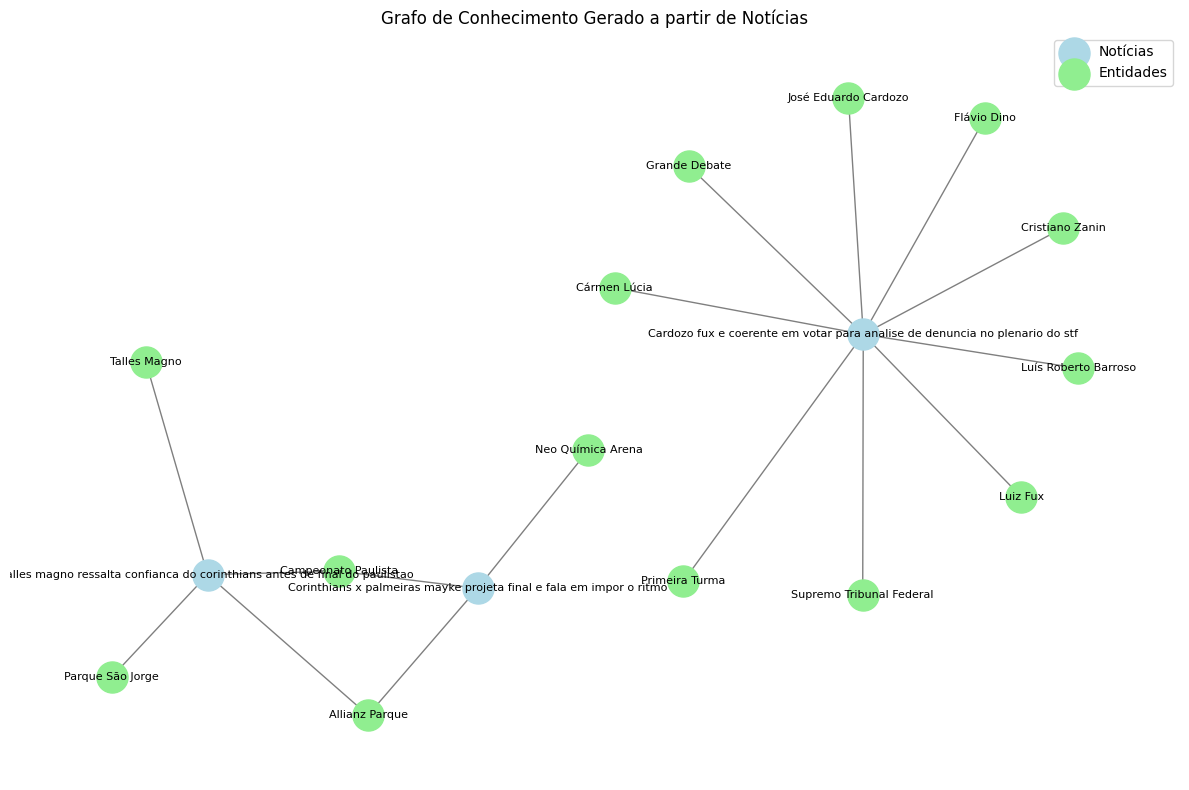

In [22]:
import psycopg2 as ps
import re
import networkx as nx
import matplotlib.pyplot as plt


# Funções simples de extração de entidades
def detectar_entidades(texto):
    nomes = re.findall(r'\b([A-ZÁÉÍÓÚÂÊÔÃÕ][a-záéíóúâêôãõç]+(?:\s+[A-ZÁÉÍÓÚÂÊÔÃÕ][a-záéíóúâêôãõç]+)+)', texto)
    organizacoes = re.findall(r'\b(?:Universidade|Prefeitura|Ministério|Banco|Secretaria|ONG|Câmara|Instituto)\s+[A-ZÁÉÍÓÚ][\w\s]+', texto)
    lugares = ['Brasil', 'São Paulo', 'Rio de Janeiro', 'Curitiba', 'Fortaleza', 'Recife']
    locais = [lugar for lugar in lugares if lugar in texto]
    return set(nomes + organizacoes + locais)

# Criar o grafo
G = nx.Graph()

# Coletar as notícias
conn = connection()
cur = conn.cursor()
cur.execute("SELECT titulo, texto FROM noticia WHERE data_coleta IS NOT NULL LIMIT 10;")
noticias = cur.fetchall()

# Preencher o grafo
for titulo, texto in noticias:
  if texto is not None:
    entidades = detectar_entidades(texto[:1000])  # limitar tamanho por performance
    G.add_node(titulo, type='noticia')
    for entidade in entidades:
        G.add_node(entidade, type='entidade')
        G.add_edge(titulo, entidade)

# Visualizar o grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
noticias_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'noticia']
entidade_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'entidade']

nx.draw_networkx_nodes(G, pos, nodelist=noticias_nodes, node_color='lightblue', label='Notícias', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=entidade_nodes, node_color='lightgreen', label='Entidades', node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Grafo de Conhecimento Gerado a partir de Notícias")
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()

#Experimento 04 - Trend de termos - Análise de Tendências Temáticas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Registros carregados: 2106


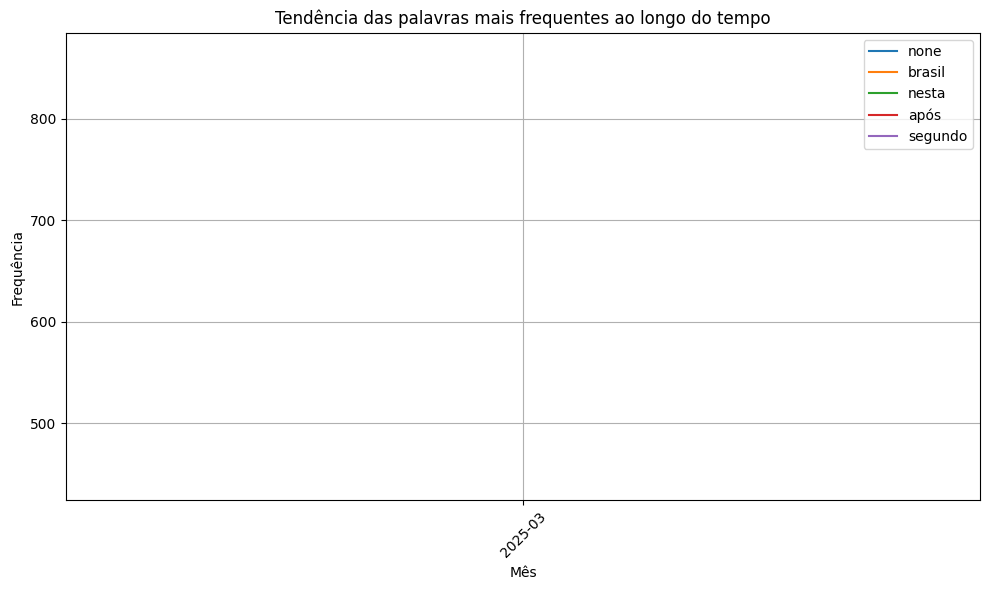

In [23]:
import psycopg2 as ps
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re

# Baixar stopwords (apenas na primeira vez)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Conexão com o banco
def connection():
    conn = ps.connect(
        host='aws-0-us-east-1.pooler.supabase.com',
        database='postgres',
        user='postgres.uukllbhblupwoaizjsyh',
        password='noticia2025',
        port=6543
    )
    return conn

# Limpeza básica de texto
def limpar_texto(texto):
    texto = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', texto)
    texto = texto.lower()
    palavras = texto.split()
    palavras_filtradas = [p for p in palavras if p not in stopwords.words('portuguese') and len(p) > 3]
    return palavras_filtradas

# Obter dados usando data_coleta
conn = connection()
cur = conn.cursor()
cur.execute("SELECT texto, data_coleta FROM noticia WHERE data_coleta IS NOT NULL")
dados = cur.fetchall()

df = pd.DataFrame(dados, columns=["texto", "data_coleta"])
print("Registros carregados:", len(df))

# Garantir datetime
df['data_coleta'] = pd.to_datetime(df['data_coleta'], errors='coerce')
df = df.dropna(subset=['data_coleta'])

# Criar coluna de mês como string (ex: '2025-03')
df['mes'] = df['data_coleta'].dt.to_period('M').astype(str)
df['palavras'] = df['texto'].apply(lambda x: limpar_texto(str(x)[:1000]))

# Contagem por mês
contagens_por_mes = {}
for periodo, grupo in df.groupby('mes'):
    todas_palavras = []
    for lista in grupo['palavras']:
        todas_palavras.extend(lista)
    contagem = Counter(todas_palavras)
    contagens_por_mes[periodo] = contagem

# Selecionar top 5 palavras mais comuns
palavras_totais = Counter()
for contagem in contagens_por_mes.values():
    palavras_totais.update(contagem)
top_5 = [palavra for palavra, _ in palavras_totais.most_common(5)]

# Preparar DataFrame
dados_plot = []
for mes, contagem in contagens_por_mes.items():
    linha = {'mes': mes}
    for palavra in top_5:
        linha[palavra] = contagem.get(palavra, 0)
    dados_plot.append(linha)

dados_df = pd.DataFrame(dados_plot)
dados_df = dados_df.sort_values('mes')
dados_df.set_index('mes', inplace=True)

# Gerar gráfico
plt.figure(figsize=(10, 6))
for palavra in top_5:
    plt.plot(dados_df.index, dados_df[palavra], label=palavra)

plt.title("Tendência das palavras mais frequentes ao longo do tempo")
plt.xlabel("Mês")
plt.ylabel("Frequência")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


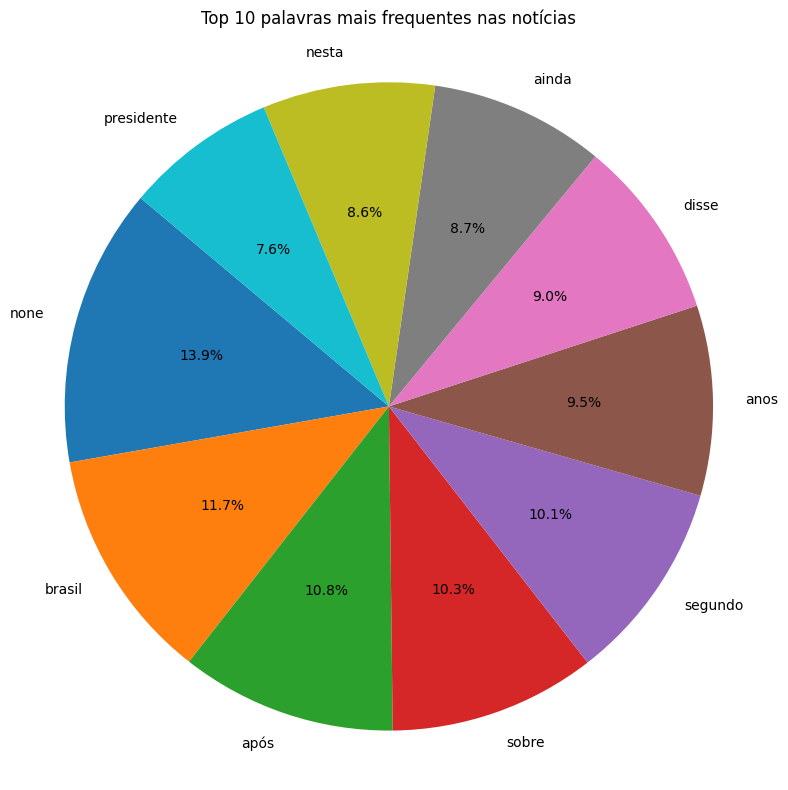

In [24]:
import psycopg2 as ps
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re

# Baixar stopwords (apenas na primeira vez)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Conexão com o banco
def connection():
    conn = ps.connect(
        host='aws-0-us-east-1.pooler.supabase.com',
        database='postgres',
        user='postgres.uukllbhblupwoaizjsyh',
        password='noticia2025',
        port=6543
    )
    return conn

# Limpeza de texto
def limpar_texto(texto):
    texto = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', texto)
    texto = texto.lower()
    palavras = texto.split()
    palavras_filtradas = [p for p in palavras if p not in stopwords.words('portuguese') and len(p) > 3]
    return palavras_filtradas

# Obter dados do banco
conn = connection()
cur = conn.cursor()
cur.execute("SELECT texto FROM noticia WHERE data_coleta IS NOT NULL")
dados = cur.fetchall()

# Processar textos
todas_palavras = []
for texto in dados:
    palavras = limpar_texto(str(texto[0])[:2000])  # limitar para otimizar
    todas_palavras.extend(palavras)

# Contar e selecionar top 10
contagem = Counter(todas_palavras)
top_10 = contagem.most_common(10)

# Separar dados para o gráfico
labels = [item[0] for item in top_10]
valores = [item[1] for item in top_10]

# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 palavras mais frequentes nas notícias")
plt.axis('equal')
plt.tight_layout()
plt.show()
